In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
%matplotlib inline
import matplotlib.pyplot as plt

In [78]:
path = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [7]:
#Removing lights and date from column
new_path = path.drop(columns = ['lights', 'date'])


In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_new_path = pd.DataFrame(scaler.fit_transform(new_path), columns=new_path.columns) 

In [77]:
path_features = normalised_new_path.drop(columns=['Appliances'])
appliances_target = normalised_new_path['Appliances']

In [18]:
# I want to create test-train-split now
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(path_features, appliances_target, test_size = 0.3, random_state = 42)


In [19]:
#To Linear regression now
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [26]:
#Let me see some result
prediction = model.predict(x_test)
prediction

array([0.03322207, 0.24411599, 0.03400024, ..., 0.06844707, 0.10032325,
       0.05722198])

In [22]:
#See intercept
print("intercept", model.intercept_)

intercept 0.15290295882253085


In [24]:
#Let me have a look at the slope
print('slope', model.coef_)

slope [-0.00328105  0.5535466  -0.23617792 -0.45669795  0.29062714  0.09604827
  0.028981    0.02638578 -0.01565684  0.01600579  0.23642491  0.03804865
  0.01031878 -0.04461364  0.10199505 -0.15759548 -0.18994077 -0.03980032
 -0.32185967  0.00683933 -0.07767065  0.02918313  0.01230661  0.11775773
  0.0007701   0.0007701 ]


In [25]:
#Let me check the R square value (coefficient of determination)
r_sq = model.score(x_test, y_test)
r_sq

0.14890246319303535

In [27]:
from sklearn import metrics
print('MAE', metrics.mean_absolute_error(y_test, prediction))

MAE 0.050133623977429535


In [30]:
print('MSE', metrics.mean_squared_error(y_test, prediction))

MSE 0.007658778867195367


In [31]:
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

RMSE 0.0875144494766171


In [32]:
print('R2 score', metrics.r2_score(y_test, prediction))

R2 score 0.14890246319303535


In [33]:
#Let me enter Ridge Regression
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.5)
#fitting it
ridge_reg.fit(x_train, y_train)
predictionII = ridge_reg.predict(x_test)

In [34]:
#Let me get some result
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, predictionII)))

RMSE 0.08754118590838054


In [35]:
print('R2 Score', metrics.r2_score(y_test, predictionII))

R2 Score 0.14838234823312768


In [36]:
#Utilizing Alpha = 2
ridge_regII = Ridge(alpha=2)
#fitting it
ridge_regII.fit(x_train, y_train)
predictionIII = ridge_regII.predict(x_test)

In [37]:
#let me see result
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, predictionIII)))

RMSE 0.08768227713791653


In [38]:
print('R2 Score', metrics.r2_score(y_test, predictionIII))

R2 Score 0.14563501031152737


In [40]:
#Let me enter Lasso Regression now
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
#fit the lasso
lasso_reg.fit(x_train,y_train)
predictionIV = lasso_reg.predict(x_test)

In [41]:
#Let me see some result
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, predictionIV)))

RMSE 0.09358170467245137


In [42]:
print('R2 Score', metrics.r2_score(y_test, predictionIV))

R2 Score 0.026800880567125818


In [ ]:
#Okay that's a great practice!!!

In [ ]:
# HERE ARE WORKING TO QUIZ QUESTIONS

<AxesSubplot:xlabel='T2', ylabel='T6'>

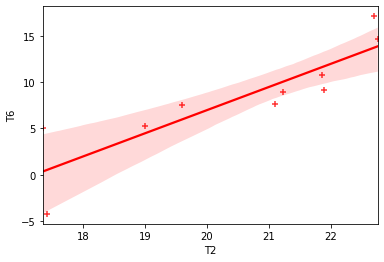

In [44]:
from sklearn import linear_model
linear_reg_path = path[['T2', 'T6']].sample(10, random_state = 2)
sns.regplot(x='T2', y='T6', data = linear_reg_path, color = 'red', marker = '+')


In [53]:
from sklearn import linear_model
linear_model = path[['T2', 'T6']].sample(15, random_state = 2)
model.LinearRegression(x='T2', y='T6', data = linear_model)

AttributeError: 'LinearRegression' object has no attribute 'LinearRegression'

In [63]:
path = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
column_names ={'T2':'x', 'T6': 'y'}
path=path.rename(columns=column_names)
simple_linear_reg=path[['x', 'y']].sample(15, random_state = 2)

In [76]:
model = path.fit('T2','T6')

AttributeError: 'DataFrame' object has no attribute 'fit'